Set DATE-AVG to '2025-05-06T16:59:22.421' from MJD-AVG.
Set DATE-END to '2025-05-06T17:21:22.408' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -25.271881 from OBSGEO-[XYZ].
Set OBSGEO-H to 1611441536.798 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
/scratch/local/11825250/ipykernel_749597/3077397868.py:56: RuntimeWarning: divide by zero encountered in divide
  f335_f480_ratio = f335_reprj_img / f480_reprj_img
/scratch/local/11825250/ipykernel_749597/3077397868.py:56: RuntimeWarning: invalid value encountered in divide
  f335_f480_ratio = f335_reprj_img / f480_reprj_img


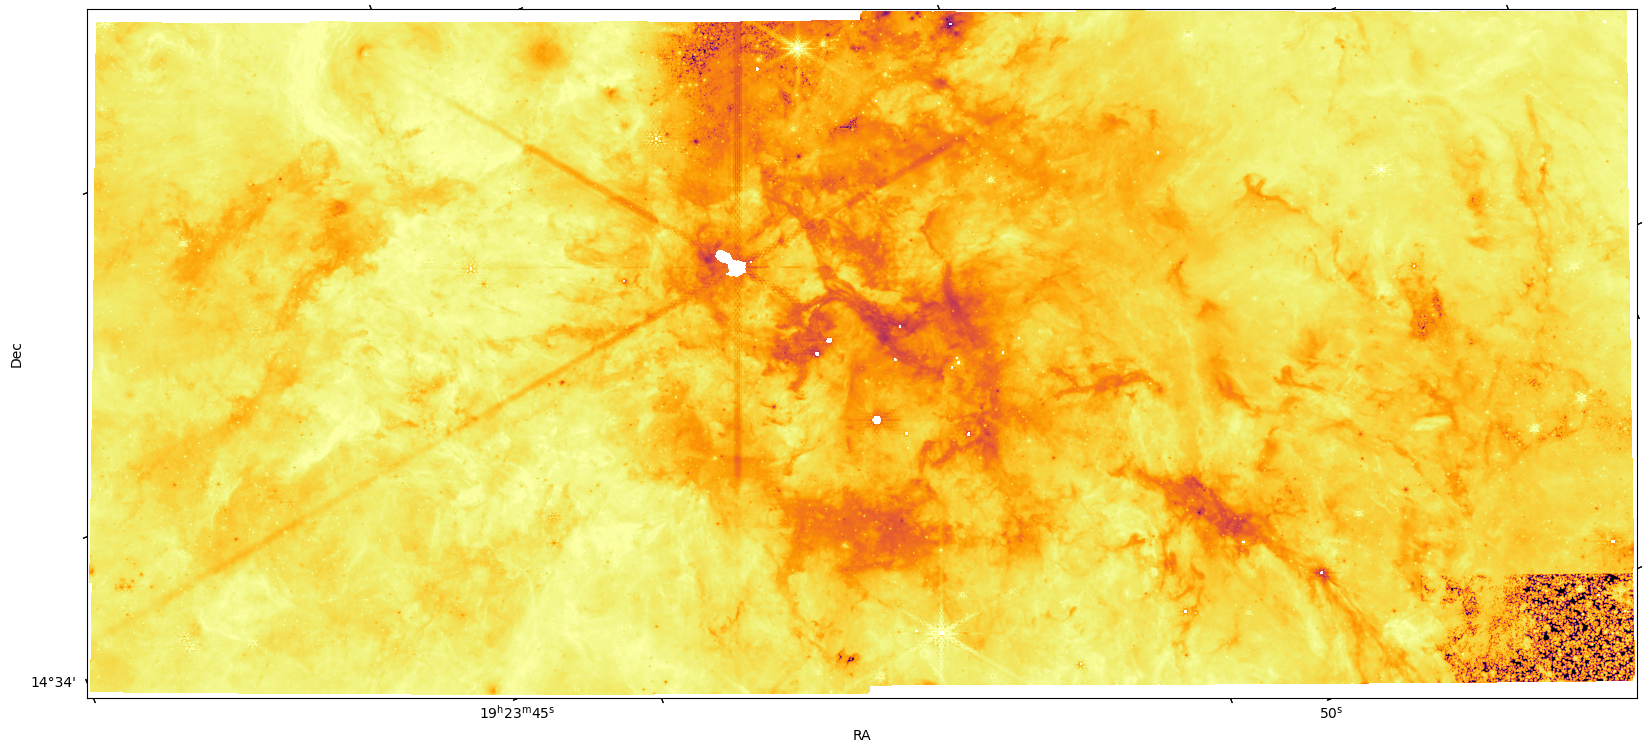

In [2]:
from astropy.io import fits
import numpy as np
from astropy.visualization import simple_norm
import pylab as plt
from astropy import wcs
import os
from reproject import reproject_interp
import PIL
#import pyavm
import shutil
from matplotlib.colors import LinearSegmentedColormap


image_filenames ={
    "f140m": "/orange/adamginsburg/jwst/w51/F140M/pipeline/jw06151-o001_t001_nircam_clear-f140m-merged_i2d.fits",
    "f150w": "/orange/adamginsburg/jwst/w51/F150W/pipeline/jw06151-o001_t001_nircam_clear-f150w-merged_i2d.fits",
    "f162m": "/orange/adamginsburg/jwst/w51/F162M/pipeline/jw06151-o001_t001_nircam_clear-f162m-merged_i2d.fits",
    "f182m": "/orange/adamginsburg/jwst/w51/F182M/pipeline/jw06151-o001_t001_nircam_clear-f182m-merged_i2d.fits",
    "f187n": "/orange/adamginsburg/jwst/w51/F187N/pipeline/jw06151-o001_t001_nircam_clear-f187n-merged_i2d.fits",
    "f210m": "/orange/adamginsburg/jwst/w51/F210M/pipeline/jw06151-o001_t001_nircam_clear-f210m-merged_i2d.fits",
    "f335m": "/orange/adamginsburg/jwst/w51/F300M/pipeline/jw06151-o001_t001_nircam_clear-f335m-merged_i2d.fits",
    "f360m": "/orange/adamginsburg/jwst/w51/F360M/pipeline/jw06151-o001_t001_nircam_clear-f360m-merged_i2d.fits",
    "f405n": "/orange/adamginsburg/jwst/w51/F405N/pipeline/jw06151-o001_t001_nircam_clear-f405n-merged_i2d.fits",
    "f410m": "/orange/adamginsburg/jwst/w51/F410M/pipeline/jw06151-o001_t001_nircam_clear-f410m-merged_i2d.fits", # weird, the filename is different from what is downloaded with the STScI pipeline...
    "f480m": "/orange/adamginsburg/jwst/w51/F480M/pipeline/jw06151-o001_t001_nircam_clear-f480m-merged_i2d.fits",
    "f560w": "/orange/adamginsburg/jwst/w51/F560W/pipeline/jw06151-o002_t001_miri_f560w_i2d.fits",
    "f770w": "/orange/adamginsburg/jwst/w51/F770W/pipeline/jw06151-o002_t001_miri_f770w_i2d.fits",
    "f1000w": "/orange/adamginsburg/jwst/w51/F1000W/pipeline/jw06151-o002_t001_miri_f1000w_i2d.fits",
    "f1280w": "/orange/adamginsburg/jwst/w51/F1280W/pipeline/jw06151-o002_t001_miri_f1280w_i2d.fits",
    "f1500w": "/orange/adamginsburg/jwst/w51/F1500W/pipeline/jw06151-o002_t001_miri_f1500w_i2d.fits",
    "f2100w": "/orange/adamginsburg/jwst/w51/F2100W/pipeline/jw06151-o002_t001_miri_f2100w_i2d.fits",
    
}

image_sub_filenames = {
    "f405n-f410m": "/orange/adamginsburg/jwst/w51/F405_minus_F410cont_pipeline_v0.1.fits",
    "f410m-f405n": "/orange/adamginsburg/jwst/w51/F410_minus_F405_fractional_bandwidth_pipeline_v0.1.fits",
    "f187n-f182m": "/orange/adamginsburg/jwst/w51/F187_minus_F182cont_pipeline_v0.1.fits",

}
from astropy.wcs import WCS

reproj_dir = '/orange/adamginsburg/jwst/w51/data_reprojected_480/'
repr480_image_filenames = {x: y.replace("i2d", "i2d_reprj_f480") for x,y in image_filenames.items()}
repr480_image_filenames = {x: (reproj_dir+os.path.basename(y)) for x,y in repr480_image_filenames.items()}



ref_fits = fits.open(repr480_image_filenames['f480m'])
tgt_header = fits.getheader(repr480_image_filenames['f480m'], ext=('SCI', 1))
wcs_header = WCS(tgt_header)

f335_reprj_img = fits.getdata(repr480_image_filenames['f335m'], ext=('SCI', 1))
f480_reprj_img = fits.getdata(repr480_image_filenames['f480m'], ext=('SCI', 1))

f335_f480_ratio = f335_reprj_img / f480_reprj_img

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection=wcs_header)
norm = simple_norm(f335_f480_ratio, 'log', percent=99)
im = ax.imshow(f335_f480_ratio, norm=norm, cmap='inferno', origin='lower')
ax.set_xlabel("RA")
ax.set_ylabel("Dec")

basepath = '/orange/adamginsburg/jwst/w51/filter_subtractions'
hdus = fits.HDUList()
hdus.append(fits.PrimaryHDU(data=f335_f480_ratio, header=tgt_header))
hdus.writeto(f'{basepath}/f335_f480_ratio.fits', overwrite=True)


/scratch/local/11825250/ipykernel_749597/1188964882.py:4: RuntimeWarning: divide by zero encountered in divide
  f405_f480_ratio = f405_reprj_img / f480_reprj_img
/scratch/local/11825250/ipykernel_749597/1188964882.py:4: RuntimeWarning: invalid value encountered in divide
  f405_f480_ratio = f405_reprj_img / f480_reprj_img


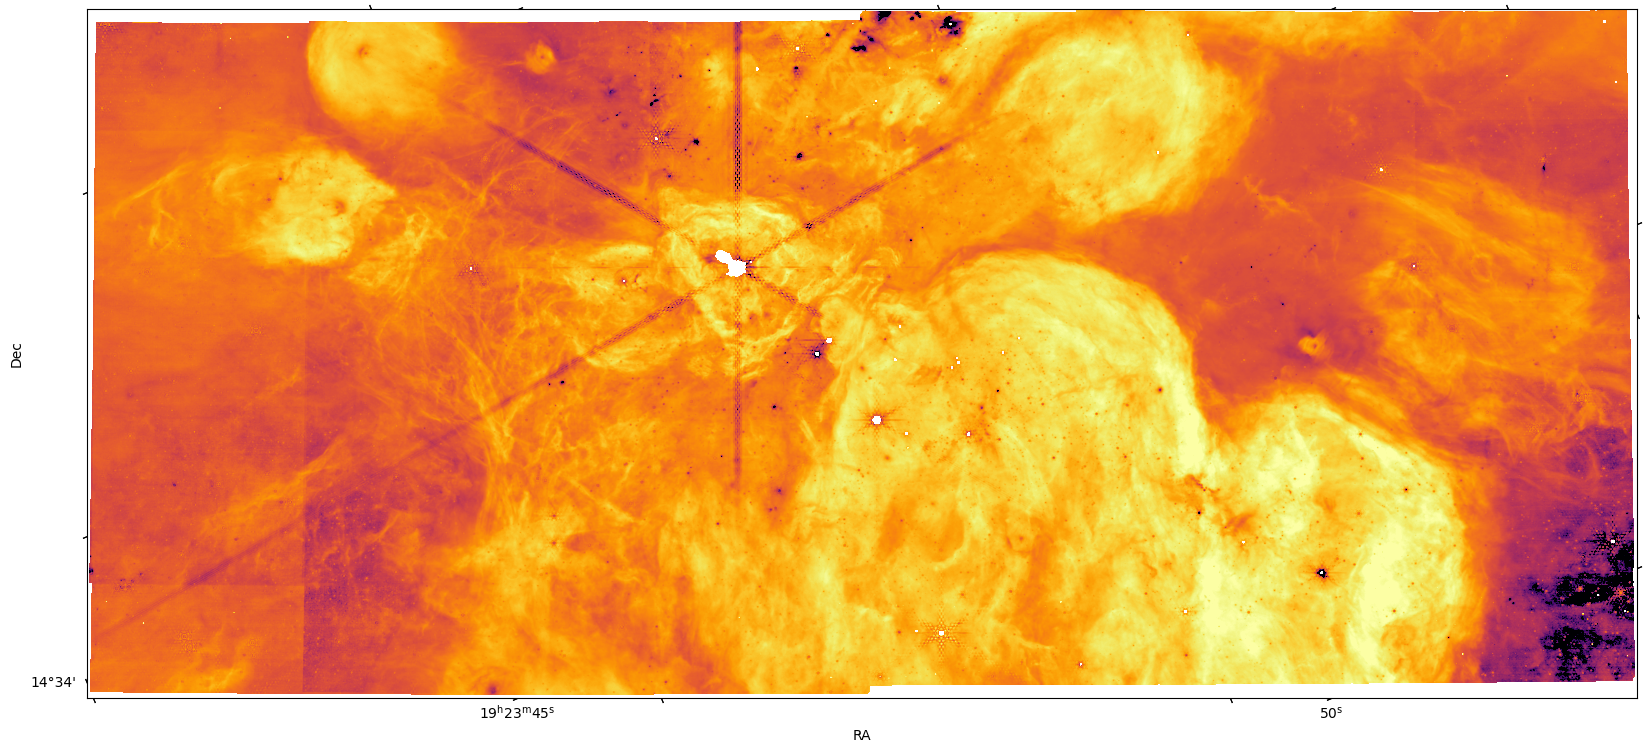

In [3]:
f405_reprj_img = fits.getdata(repr480_image_filenames['f405n'], ext=('SCI', 1))
f480_reprj_img = fits.getdata(repr480_image_filenames['f480m'], ext=('SCI', 1))

f405_f480_ratio = f405_reprj_img / f480_reprj_img

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection=wcs_header)
norm = simple_norm(f405_f480_ratio, 'log', percent=99)
im = ax.imshow(f405_f480_ratio, norm=norm, cmap='inferno', origin='lower')
ax.set_xlabel("RA")
ax.set_ylabel("Dec")

basepath = '/orange/adamginsburg/jwst/w51/filter_subtractions'
hdus = fits.HDUList()
hdus.append(fits.PrimaryHDU(data=f405_f480_ratio, header=tgt_header))
hdus.writeto(f'{basepath}/f405_f480_ratio.fits', overwrite=True)

/scratch/local/11825250/ipykernel_749597/3670465929.py:4: RuntimeWarning: divide by zero encountered in divide
  f335_f405_ratio = f335_reprj_img / f405_reprj_img
/scratch/local/11825250/ipykernel_749597/3670465929.py:4: RuntimeWarning: invalid value encountered in divide
  f335_f405_ratio = f335_reprj_img / f405_reprj_img


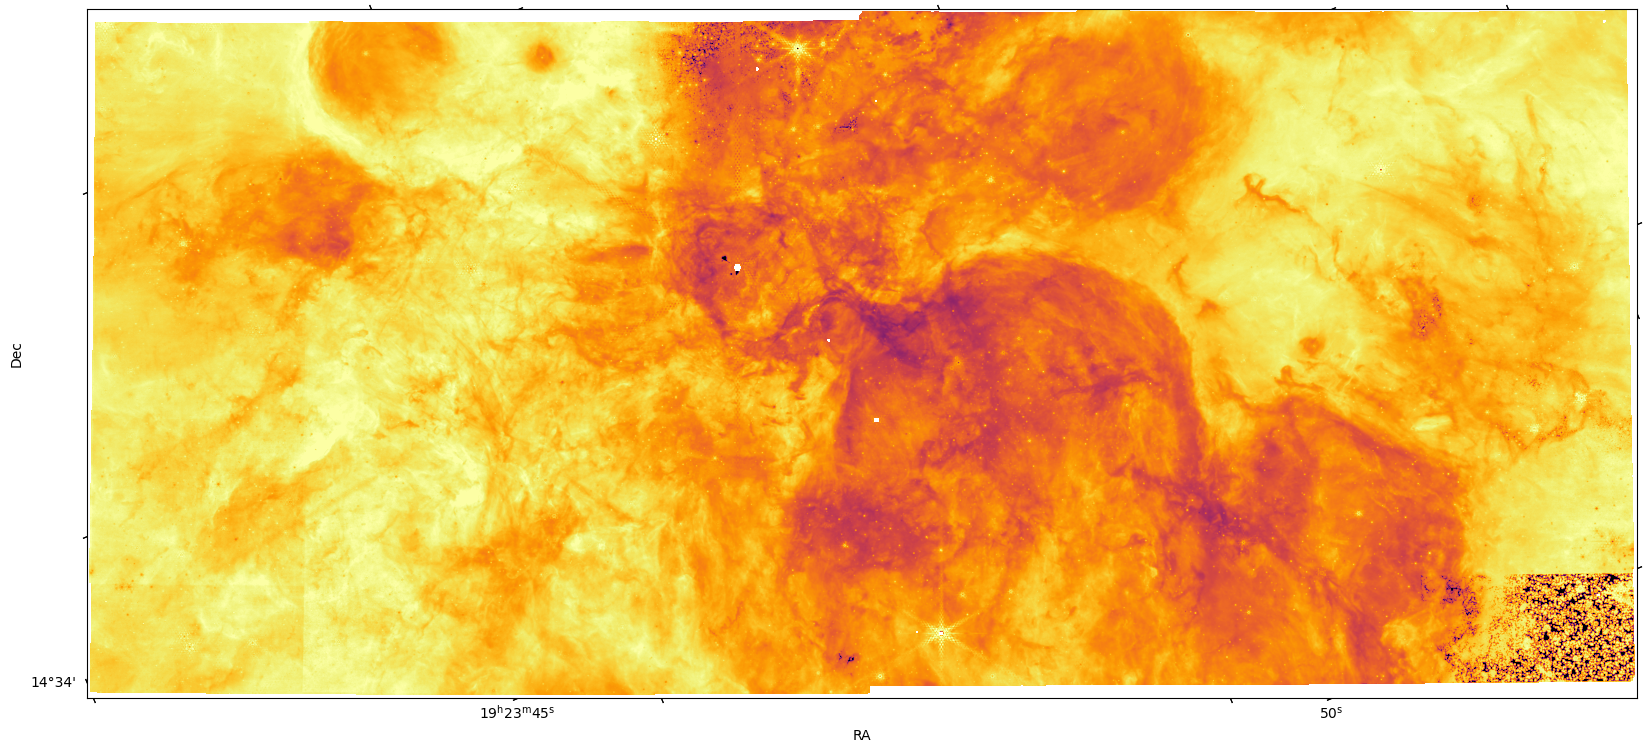

In [4]:
f335_reprj_img = fits.getdata(repr480_image_filenames['f335m'], ext=('SCI', 1))
f405_reprj_img = fits.getdata(repr480_image_filenames['f405n'], ext=('SCI', 1))

f335_f405_ratio = f335_reprj_img / f405_reprj_img

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection=wcs_header)
norm = simple_norm(f335_f405_ratio, 'log', percent=99)
im = ax.imshow(f335_f405_ratio, norm=norm, cmap='inferno', origin='lower')
ax.set_xlabel("RA")
ax.set_ylabel("Dec")

basepath = '/orange/adamginsburg/jwst/w51/filter_subtractions'
hdus = fits.HDUList()
hdus.append(fits.PrimaryHDU(data=f335_f405_ratio, header=tgt_header))
hdus.writeto(f'{basepath}/f335_f405_ratio.fits', overwrite=True)

/scratch/local/11825250/ipykernel_749597/1098591930.py:4: RuntimeWarning: divide by zero encountered in divide
  f560_f480_ratio = f560_reprj_img / f480_reprj_img


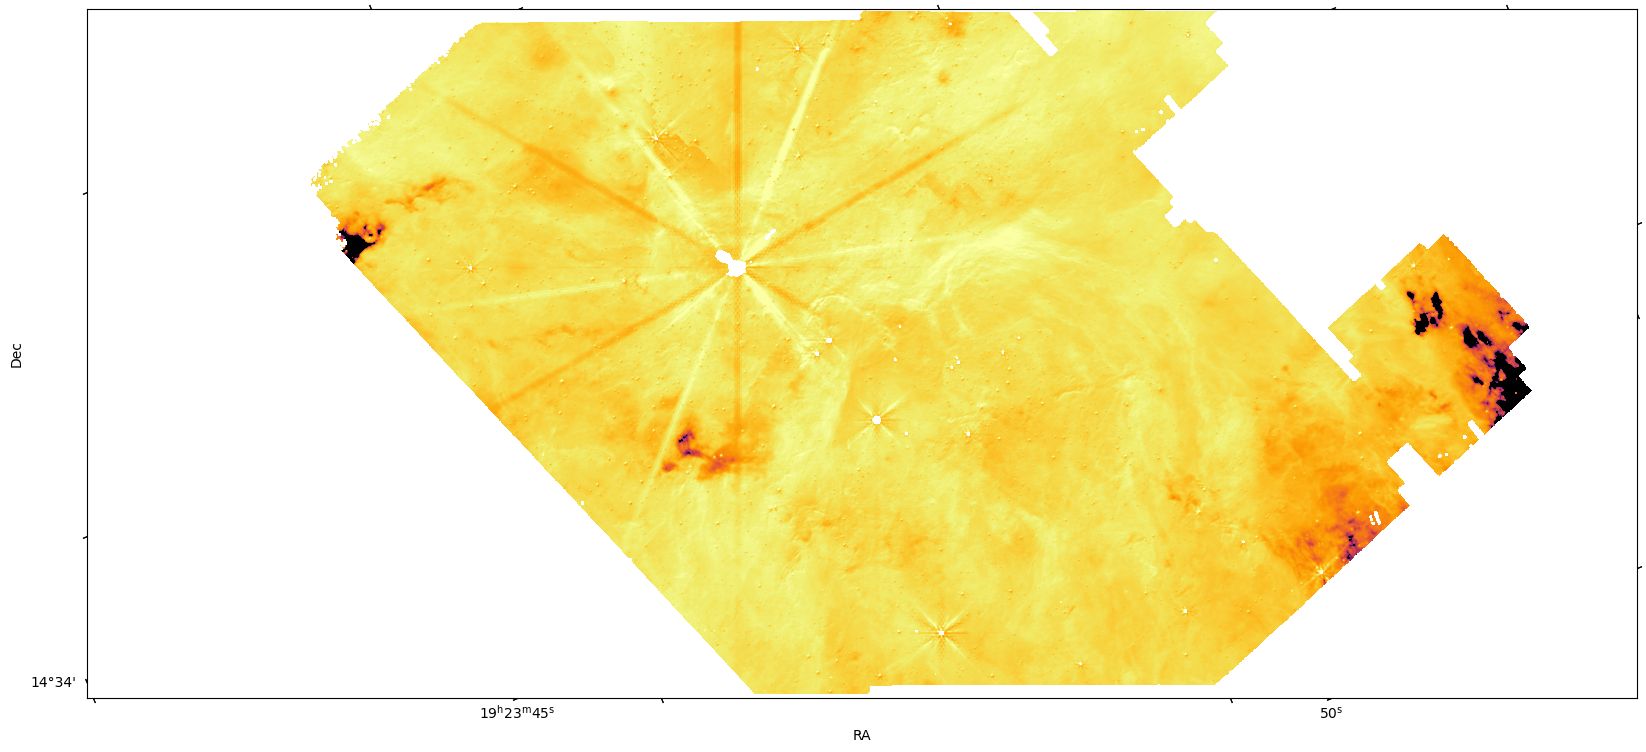

In [5]:
f560_reprj_img = fits.getdata(repr480_image_filenames['f560w'], ext=('SCI', 1))
f480_reprj_img = fits.getdata(repr480_image_filenames['f480m'], ext=('SCI', 1))

f560_f480_ratio = f560_reprj_img / f480_reprj_img

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection=wcs_header)
norm = simple_norm(f560_f480_ratio, 'log', percent=99)
im = ax.imshow(f560_f480_ratio, norm=norm, cmap='inferno', origin='lower')
ax.set_xlabel("RA")
ax.set_ylabel("Dec")

basepath = '/orange/adamginsburg/jwst/w51/filter_subtractions'
hdus = fits.HDUList()
hdus.append(fits.PrimaryHDU(data=f560_f480_ratio, header=tgt_header))
hdus.writeto(f'{basepath}/f560_f480_ratio.fits', overwrite=True)